In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import ta 

<span style="font-size:20px">XG Boost for apple stock</span>

In [47]:
df = pd.read_csv("cleaned_stock_data.csv", parse_dates=["Date"])

df = df[df["Stock"] == "AAPL"] 

df.sort_values("Date", inplace=True)

df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()
df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean()

df["Close_Lag_1"] = df["Close"].shift(1)
df["Close_Lag_3"] = df["Close"].shift(3)
df["Close_Lag_7"] = df["Close"].shift(7)
df["Close_Lag_14"] = df["Close"].shift(14)

df["RSI_14"] = ta.momentum.RSIIndicator(df["Close"], window=14).rsi()

bollinger = ta.volatility.BollingerBands(df["Close"], window=20)
df["Bollinger_High"] = bollinger.bollinger_hband()
df["Bollinger_Low"] = bollinger.bollinger_lband()

df["Volatility"] = df["High"] - df["Low"]

df.dropna(inplace=True)

df.to_csv("processed_stock_data.csv", index=False)
print("Feature Engineering Done ✅")


Feature Engineering Done ✅


In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

df = pd.read_csv("processed_stock_data.csv")

features = ["SMA_10", "SMA_50", "EMA_10", "EMA_50", "Close_Lag_1", "Close_Lag_3", "Close_Lag_7", "Close_Lag_14", "RSI_14", "Bollinger_High", "Bollinger_Low", "Volatility"]
X = df[features]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_model = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.03, max_depth=5, subsample=0.7, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)


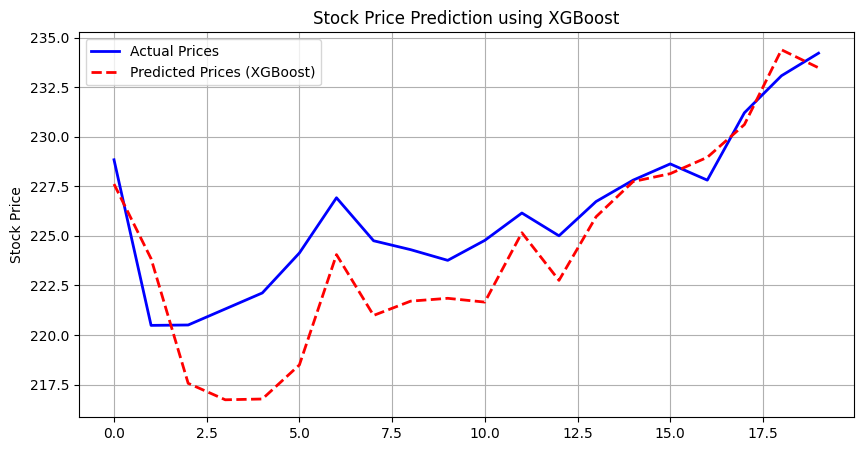

In [49]:
import matplotlib.pyplot as plt

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test[:20].values, label="Actual Prices", color="blue", linewidth=2)  # Show only first 20 points
plt.plot(y_pred[:20], label="Predicted Prices (XGBoost)", color="red", linestyle="dashed", linewidth=2)

plt.ylabel("Stock Price")
plt.title("Stock Price Prediction using XGBoost")
plt.legend()
plt.grid(True)

plt.show()


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mape = (abs(y_test - y_pred) / y_test).mean() * 100  # MAPE
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 9.9279
Root Mean Squared Error (RMSE): 13.5026
Mean Absolute Percentage Error (MAPE): 4.03%
